In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset = pd.read_csv("./train.csv")
dataset.describe()

In [ ]:
# Statistiques sur le dataset entier

plot_df = dataset.Transported.value_counts()
plot_df.plot(kind="bar")

fig, ax = plt.subplots(7,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset['VRDeck'], color='b', bins=50, ax=ax[4]);
ax[5].pie([len(dataset.loc[dataset['CryoSleep'] == True]), len(dataset.loc[dataset['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(dataset['HomePlanet'], color='b', bins=50, ax=ax[6])

dataset[['Deck', 'Cabin_num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)

# Heatmap of missing values
na_cols=dataset.columns[dataset.isna().any()].tolist()
plt.figure(figsize=(12,6))
sns.heatmap(dataset[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

print(len(dataset.loc[dataset['VIP'] == True]), "vips sur", len(dataset))

In [ ]:
# Statistiques sur les personnes ayant été transportées

true_df = dataset.loc[dataset["Transported"] == True]

print("Statistiques sur les personnes ayant été transportées")

fig, ax = plt.subplots(9,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(true_df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(np.log(1+true_df['FoodCourt']), color='b', bins=50, ax=ax[1])
sns.histplot(true_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(true_df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(true_df['VRDeck'], color='b', bins=50, ax=ax[4])
ax[5].pie([len(true_df.loc[true_df['CryoSleep'] == True]), len(true_df.loc[true_df['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(true_df['HomePlanet'], color='b', bins=50, ax=ax[6])

sns.histplot(true_df['Side'], color='b', bins=2, ax=ax[7])
sns.histplot(true_df['Deck'], color='b', ax=ax[8])

print(len(true_df.loc[true_df['VIP'] == True]), "vips sur", len(true_df))

true_df.describe()

In [ ]:
# Statistiques sur les personnes n'ayant pas été transportées

false_df = dataset.loc[dataset["Transported"] == False]

print("Statistiques sur les personnes n'ayant pas été transportées")

fig, ax = plt.subplots(9,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(false_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(np.log(1+false_df['FoodCourt']), color='b', bins=50, ax=ax[1]);
sns.histplot(false_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(false_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(false_df['VRDeck'], color='b', bins=50, ax=ax[4]);
ax[5].pie([len(false_df.loc[false_df['CryoSleep'] == True]), len(false_df.loc[false_df['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(false_df['HomePlanet'], color='b', bins=50, ax=ax[6])

sns.histplot(false_df['Side'], color='b', bins=2, ax=ax[7])
sns.histplot(false_df['Deck'], color='b', ax=ax[8])

print(len(false_df.loc[false_df['VIP'] == True]), "vips sur", len(false_df))

false_df.describe()

In [ ]:
print(dataset.info())

# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=dataset.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')



# Joint distribution of HomePlanet and Destination
HPD_gb=dataset.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')



In [ ]:
fig=plt.figure(figsize=(10,5))

dataset['Cabin_num'] = dataset['Cabin_num'].fillna(0).astype(int)

print(dataset.info())

sns.histplot(data=dataset, x='Cabin_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

In [ ]:
dataset['FoodCourt'] = np.log(1+dataset['FoodCourt'])
dataset['VRDeck'] = np.log(1+dataset['VRDeck'])

In [ ]:
dataset['ShoppingMall'] = np.log(1+dataset['ShoppingMall'])

In [ ]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
dataset['NoSpending']  = (dataset['Expenditure']==0).astype(int)

for side in ['P', 'S']:
    print(side, dataset[(dataset['Side'] == side)]['NoSpending'].count())

In [ ]:
dataset['Expenditure'] = np.log(1+dataset['Expenditure'])

In [ ]:
dataset['RoomService'] = np.log(1+dataset['RoomService'])

In [ ]:
dataset['Spa'] = np.log(1+dataset['Spa'])

In [ ]:
dataset.info()

In [ ]:
dataset['Group'] = dataset['PassengerId'].str.split('_').str[0]
groups_size = dataset['Group'].value_counts().reset_index()
groups_size.columns = ['Group', 'GroupSize']
dataset = dataset.merge(groups_size, on='Group')
dataset.loc[(dataset['GroupSize'] == 1), 'Solo'] = 1
dataset['Solo'] = dataset['Solo'].fillna(0).astype(int)

/home/antoine/.local/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/antoine/.local/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='GroupSize', ylabel='Count'>

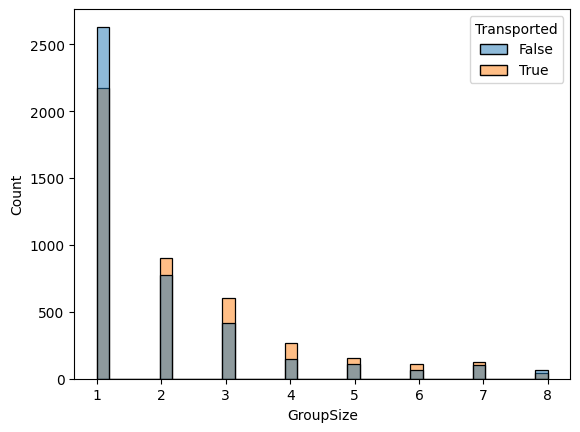

In [32]:
sns.histplot(data=dataset, x='GroupSize', hue='Transported')

In [34]:
sns.histplot(data=dataset, x='GroupSize', hue='0-12')

ValueError: Could not interpret value `0-12` for `hue`. An entry with this name does not appear in `data`.

In [52]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
dataset['NoSpending']  = (dataset['Expenditure']==0).astype(int)

for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
    print(deck, dataset[dataset['Deck'] == deck]['NoSpending'].sum() / dataset[dataset['Deck'] == deck]['PassengerId'].count())
    for destination in ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']:
        print(deck, destination, dataset[(dataset['Destination'] == destination) & (dataset['Deck'] == deck)]['PassengerId'].count())

A 0.34375
A TRAPPIST-1e 142
A PSO J318.5-22 2
A 55 Cancri e 108
B 0.6046213093709885
B TRAPPIST-1e 426
B PSO J318.5-22 3
B 55 Cancri e 333
C 0.4323962516733601
C TRAPPIST-1e 405
C PSO J318.5-22 13
C 55 Cancri e 317
D 0.2280334728033473
D TRAPPIST-1e 338
D PSO J318.5-22 17
D 55 Cancri e 113
E 0.2636986301369863
E TRAPPIST-1e 696
E PSO J318.5-22 41
E 55 Cancri e 116
F 0.23407301360057264
F TRAPPIST-1e 2088
F PSO J318.5-22 241
F 55 Cancri e 398
G 0.6565064478311841
G TRAPPIST-1e 1688
G PSO J318.5-22 461
G 55 Cancri e 365
T 0.0
T TRAPPIST-1e 5
T PSO J318.5-22 0
T 55 Cancri e 0
